In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [261]:
data=pd.read_csv('crime_data.csv')

In [262]:
data

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772
...,...,...,...,...,...,...,...,...,...
2085,7/3/2018 3:50,0,0,0,1,0,0,22.712970,75.823580
2086,7/3/2018 21:10,0,0,0,1,0,0,22.693481,75.821483
2087,7/3/2018 12:10,0,0,1,0,0,0,22.531931,75.769126
2088,7/3/2018 10:35,0,0,1,0,0,0,22.719569,75.857726


In [263]:
data.head(7)

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772
5,28-02-2018 14:15,0,0,0,1,0,0,22.735218,75.913366
6,28-02-2018 08:00,0,0,0,0,1,0,22.736766,75.908579


In [264]:
data.shape

(2090, 9)

 Act 379-Robbery

 Act 13-Gambling

 Act 279-Accident

 Act 323-Violence

 Act 302-Murder

 Act 363-Kidnapping

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2090 non-null   object 
 1   act379     2090 non-null   int64  
 2   act13      2090 non-null   int64  
 3   act279     2090 non-null   int64  
 4   act323     2090 non-null   int64  
 5   act363     2090 non-null   int64  
 6   act302     2090 non-null   int64  
 7   latitude   2090 non-null   float64
 8   longitude  2090 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 147.1+ KB


In [266]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

In [267]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')

In [268]:
data['timestamp']

0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
               ...        
2085   2018-07-03 03:50:00
2086   2018-07-03 21:10:00
2087   2018-07-03 12:10:00
2088   2018-07-03 10:35:00
2089   2018-07-03 23:45:00
Name: timestamp, Length: 2090, dtype: datetime64[ns]

In [269]:
# DATE TIME STAMP FUNCTION
column_1 = data.iloc[:,0]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [270]:
dataset1=data.drop('timestamp',axis=1)

In [271]:
data1=pd.concat([db,dataset1],axis=1)
data1

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,2018.0,7.0,3.0,3.0,184.0,27.0,27.0,1.0,1.0,3.0,0,0,0,1,0,0,22.712970,75.823580
2086,2018.0,7.0,3.0,21.0,184.0,27.0,27.0,1.0,1.0,3.0,0,0,0,1,0,0,22.693481,75.821483
2087,2018.0,7.0,3.0,12.0,184.0,27.0,27.0,1.0,1.0,3.0,0,0,1,0,0,0,22.531931,75.769126
2088,2018.0,7.0,3.0,10.0,184.0,27.0,27.0,1.0,1.0,3.0,0,0,1,0,0,0,22.719569,75.857726


In [272]:
data1.shape

(2090, 18)

## Data Analysis

In [273]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2068 non-null   float64
 1   month       2068 non-null   float64
 2   day         2068 non-null   float64
 3   hour        2068 non-null   float64
 4   dayofyear   2068 non-null   float64
 5   week        2068 non-null   float64
 6   weekofyear  2068 non-null   float64
 7   dayofweek   2068 non-null   float64
 8   weekday     2068 non-null   float64
 9   quarter     2068 non-null   float64
 10  act379      2090 non-null   int64  
 11  act13       2090 non-null   int64  
 12  act279      2090 non-null   int64  
 13  act323      2090 non-null   int64  
 14  act363      2090 non-null   int64  
 15  act302      2090 non-null   int64  
 16  latitude    2090 non-null   float64
 17  longitude   2090 non-null   float64
dtypes: float64(12), int64(6)
memory usage: 294.0 KB


In [274]:
data1.isnull().sum()

year          22
month         22
day           22
hour          22
dayofyear     22
week          22
weekofyear    22
dayofweek     22
weekday       22
quarter       22
act379         0
act13          0
act279         0
act323         0
act363         0
act302         0
latitude       0
longitude      0
dtype: int64

In [275]:
data1.dropna(inplace=True)

In [276]:
data1.isnull().sum()

year          0
month         0
day           0
hour          0
dayofyear     0
week          0
weekofyear    0
dayofweek     0
weekday       0
quarter       0
act379        0
act13         0
act279        0
act323        0
act363        0
act302        0
latitude      0
longitude     0
dtype: int64

In [277]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772


In [278]:
data1.columns[1]

'month'

## Data Visualization & Analysis

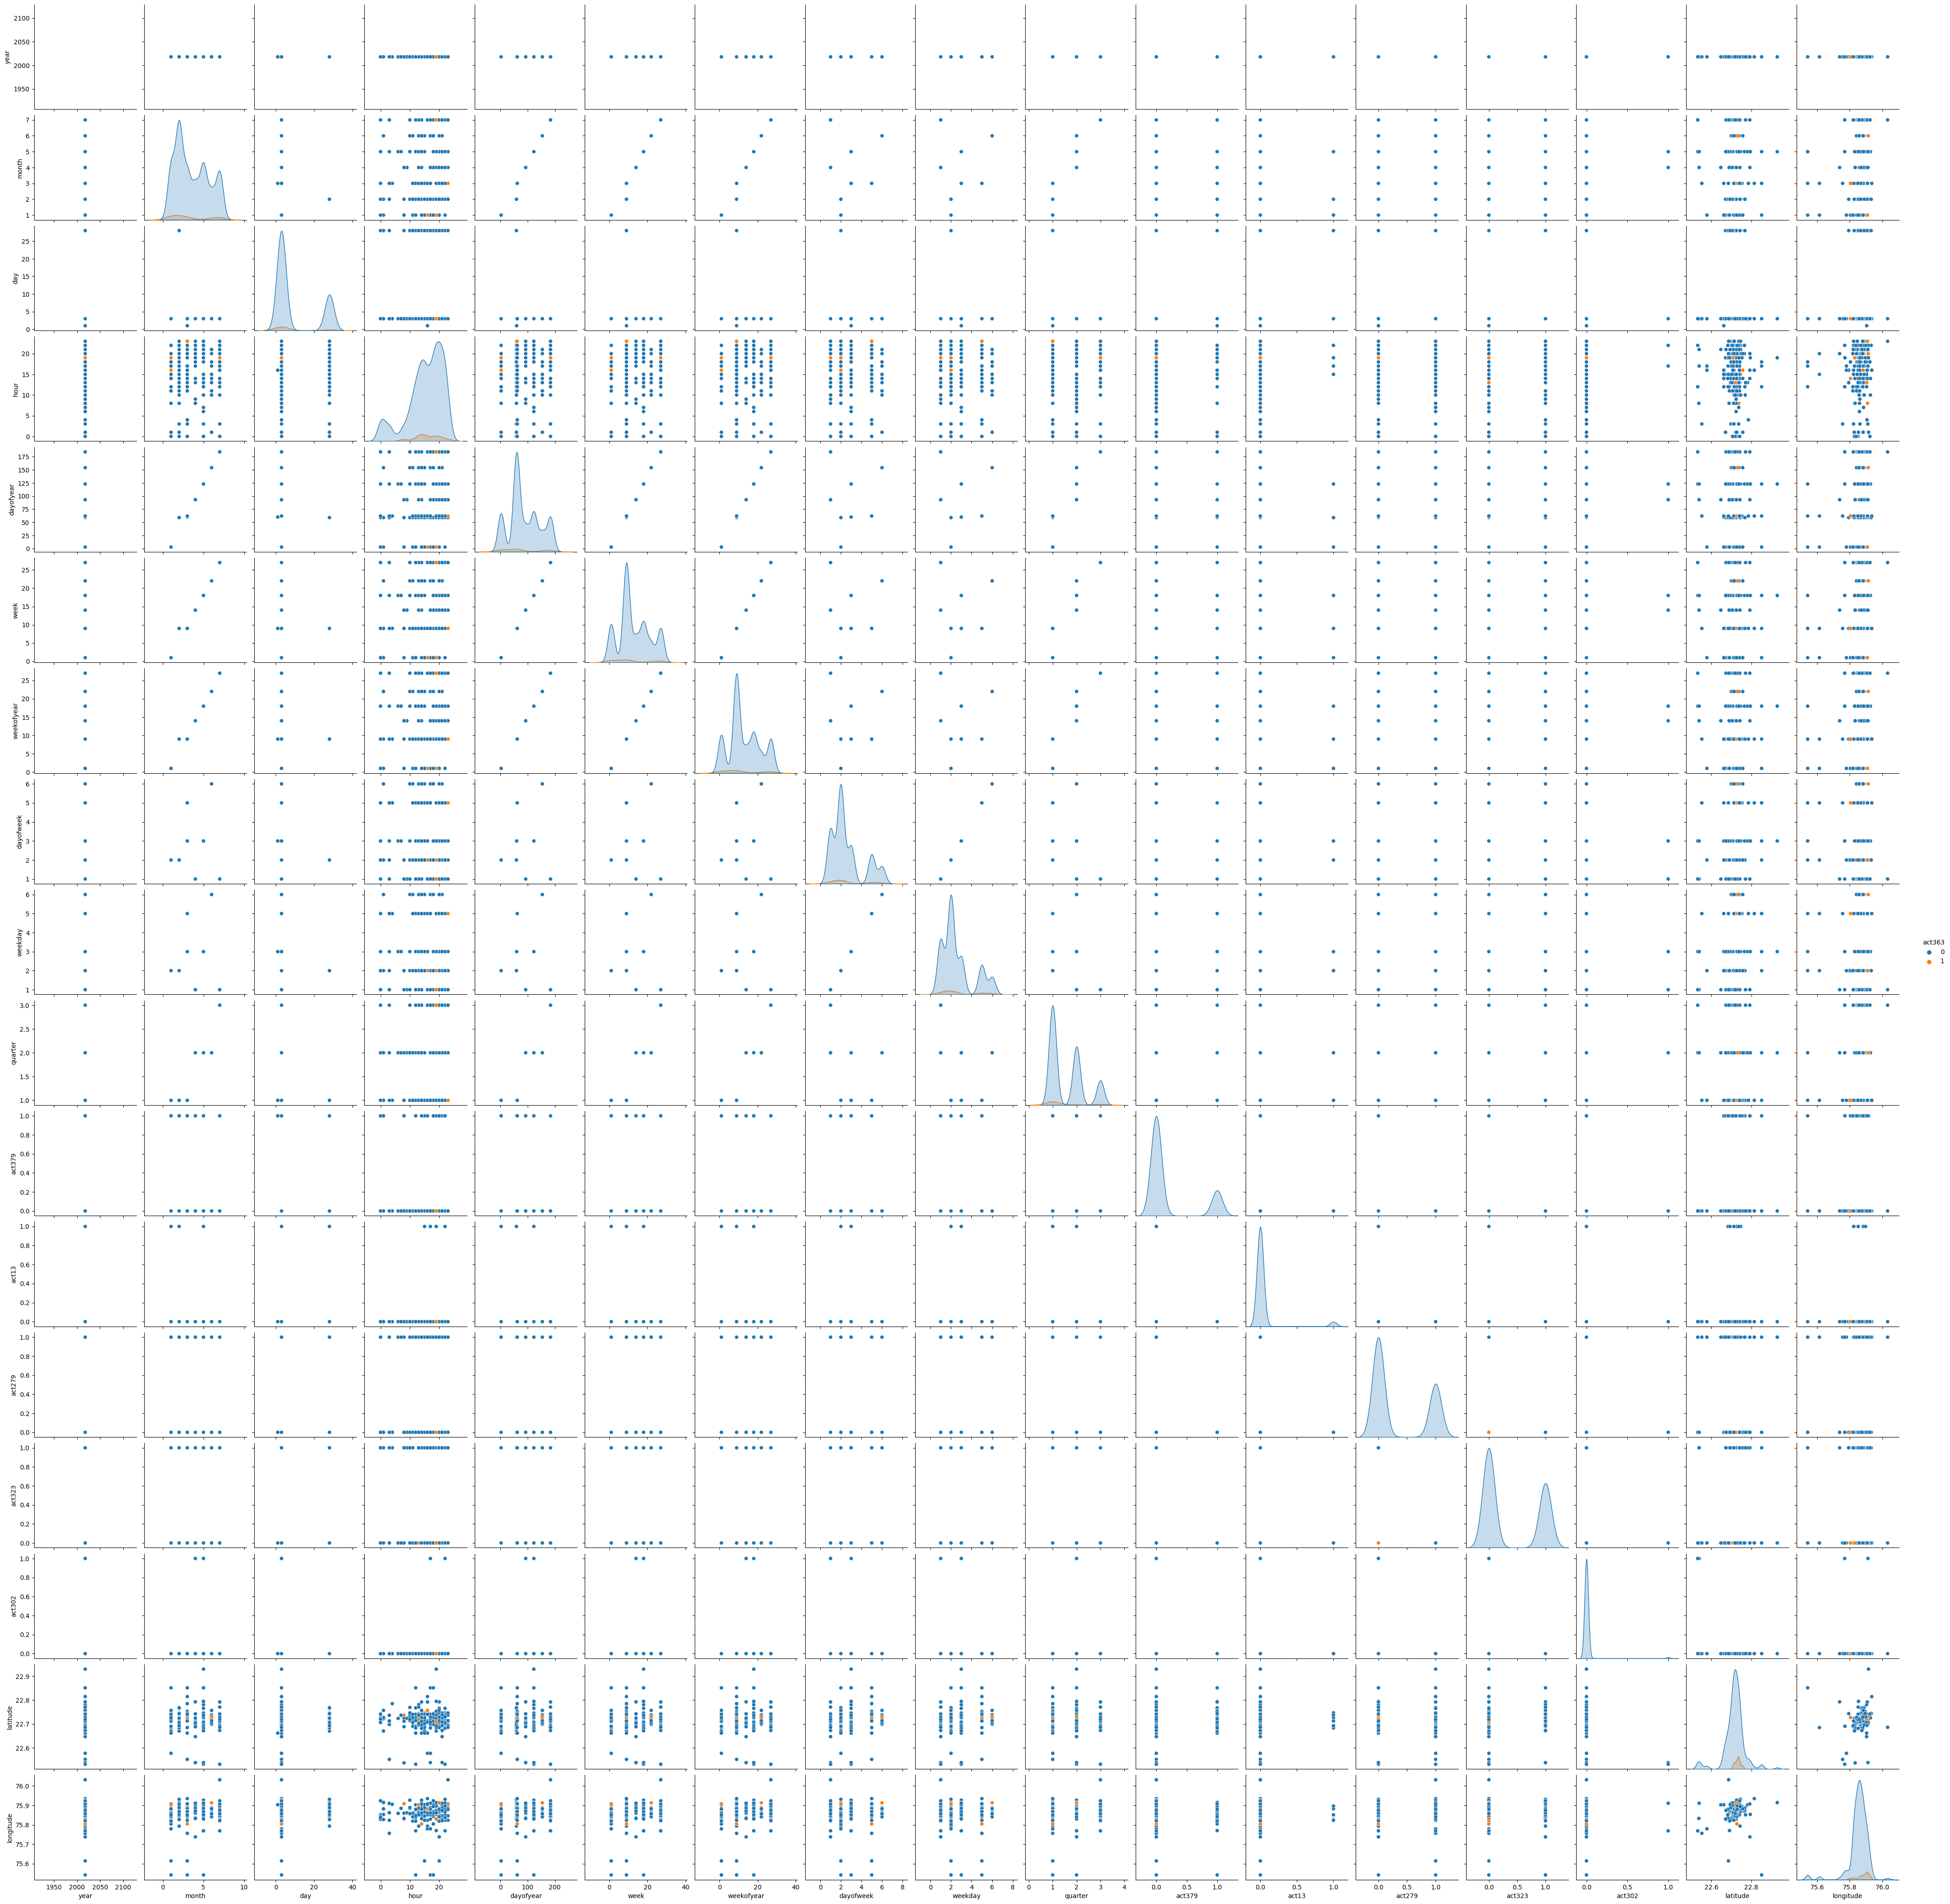

In [279]:
sns.pairplot(data1,hue='act363')

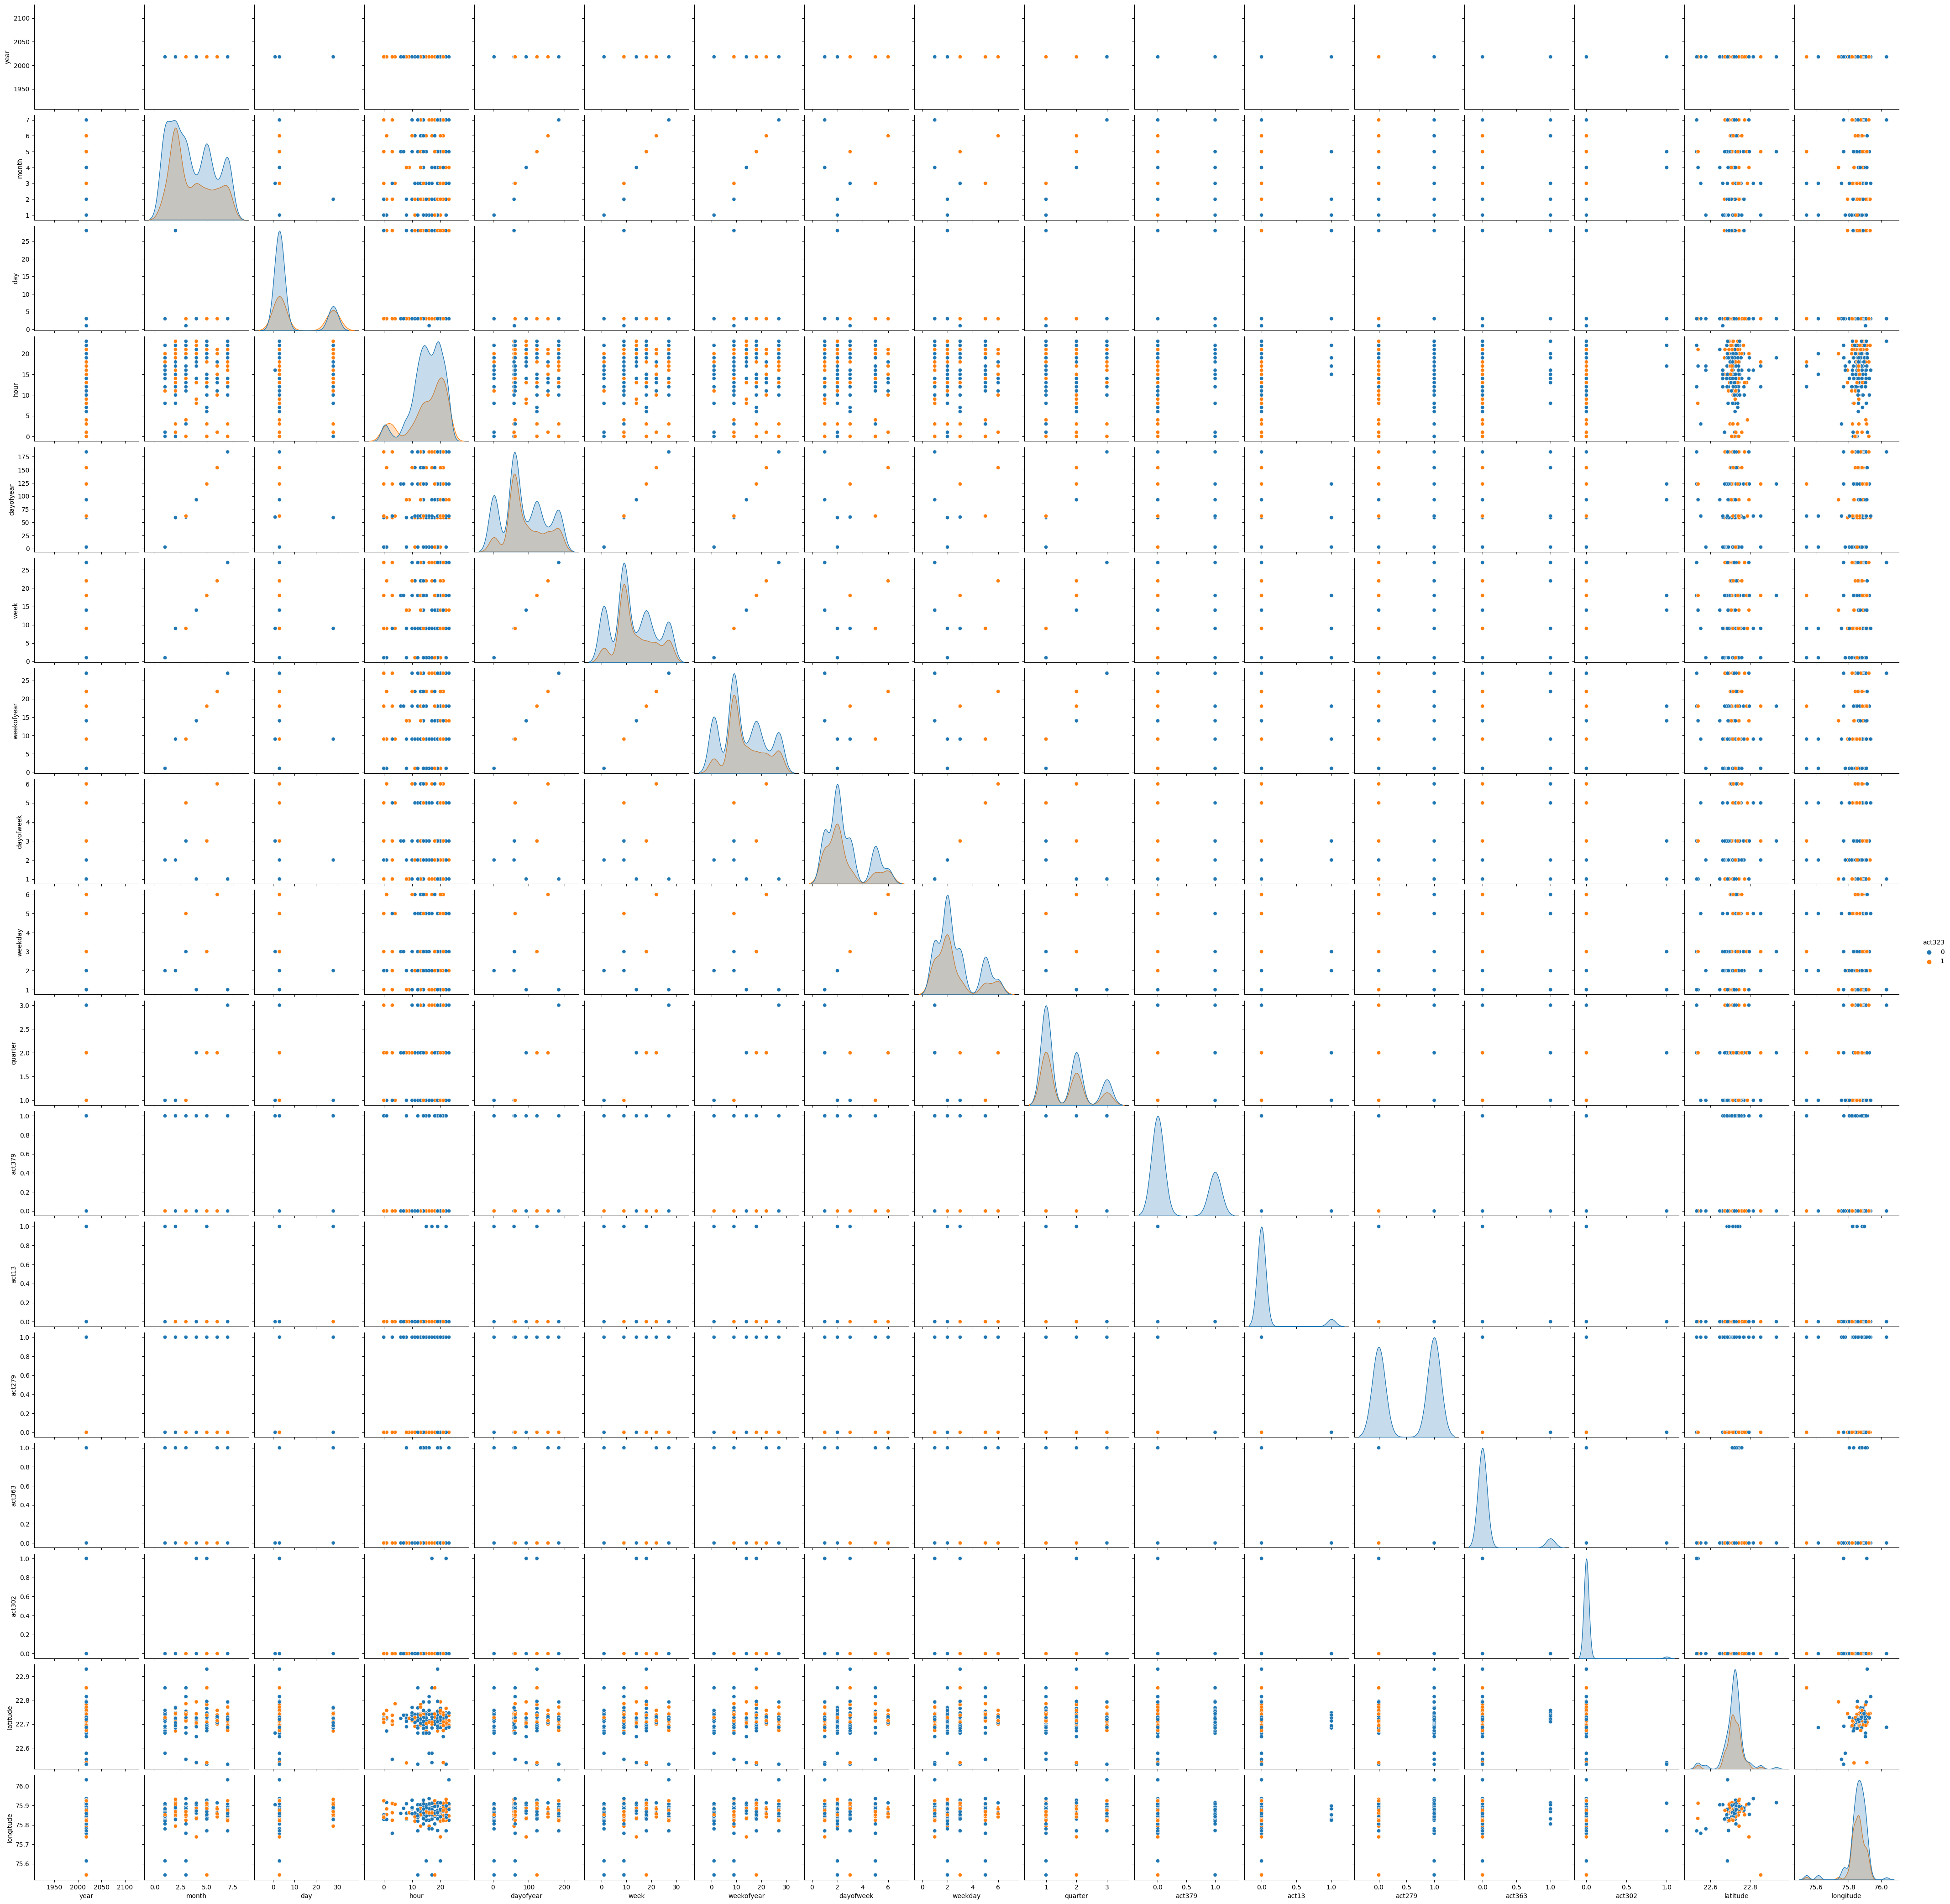

In [280]:
sns.pairplot(data1,hue='act323')

In [281]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

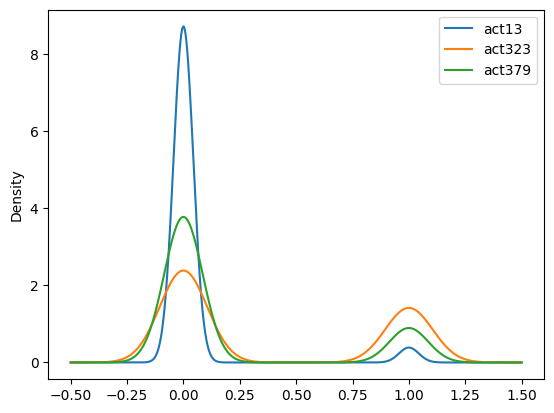

In [282]:
df1.plot.kde()
plt.show()

In [283]:
df2 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379', 'act279', 'act363', 'act302'])

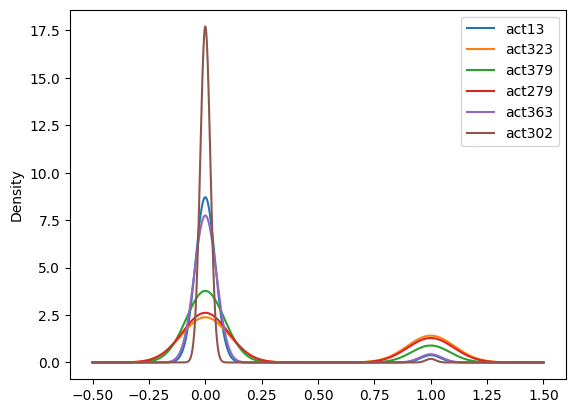

In [284]:
df2.plot.kde()
plt.show()

## X & Y array

In [285]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772


In [286]:
data1.shape

(2068, 18)

In [287]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values
#month,day,hour,dayofyear,weekofyear,latitude,longitude

In [288]:
X[4]

array([ 2.      , 28.      , 10.      , 59.      ,  9.      , 22.769531,
       75.888772])

In [289]:
y=data1.iloc[:,[10,11,12,13,14,15]].values
#act379	act13	act279	act323	act363	act302

In [290]:
y[4]

array([0, 0, 1, 0, 0, 0], dtype=int64)

In [291]:
## Splitting the data

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [294]:
X_train.shape

(1654, 7)

In [295]:
X_test.shape

(414, 7)

## Creating & Training KNN Model

In [296]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [297]:
acc1=knn.score(X_test,y_test)
acc1

0.9396135265700483

In [298]:
knn.score(X_train,y_train)

0.9818621523579202

## Creating & Training Decision Tree Model

In [299]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [300]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [301]:
y_pred=dtree.predict(X_test)

In [302]:
acc2=dtree.score(X_test,y_test)
acc2

0.9806763285024155

In [303]:
dtree.score(X_train,y_train)

0.9915356711003628

In [304]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

## Creating & Training Random Forest Model

In [305]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [306]:
y_pred=rfc.predict(X_test)

In [307]:
X_test[0]

array([ 2.      , 28.      , 15.      , 59.      ,  9.      , 22.723873,
       75.828416])

In [308]:
X_test[10]

array([  6.      ,   3.      ,  10.      , 154.      ,  22.      ,
        22.714156,  75.856339])

In [309]:
y_pred[10]

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [310]:
acc3=rfc.score(X_test,y_test)
acc3

0.9806763285024155

In [311]:
rfc.score(X_train,y_train)

0.9915356711003628

# Prediction

In [312]:
test_vector = np.reshape(np.asarray([2., 28., 15., 59. ,  9. , 22.723873,75.828416]),(1,7))
p =np.array(rfc.predict(test_vector)[0])
print(p)

label = ['Robbery','Gambling','Accident','Violence','Kidnapping','Murder']
print (label[3])

[0 0 0 1 0 0]
Violence


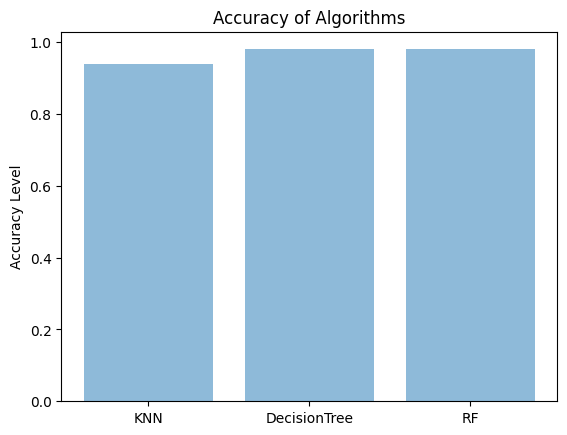

In [313]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('KNN','DecisionTree','RF')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Level')
plt.title('Accuracy of Algorithms')
 
plt.show()

In [314]:
#!pip install keras

In [315]:
#!pip install tensorflow

## deep learning model

In [316]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM ensemble
n_estimators = 3
max_epochs = 10
n_neurons = 50
ensemble = []

for i in range(n_estimators):
    model = Sequential()
    model.add(LSTM(n_neurons, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=max_epochs, verbose=0)
    ensemble.append(model)

# Predict on the testing data using the ensemble
y_preds = []
for model in ensemble:
    y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]
    y_preds.append(y_pred)

# Calculate the final predictions as the majority vote of the ensemble
y_final_pred = []
for i in range(len(y_preds[0])):
    votes = [y[i] for y in y_preds]
    y_final_pred.append(max(set(votes), key=votes.count))

# Calculate the accuracy of the ensemble
accuracy = accuracy_score(y_test, y_final_pred)
acc4=(f"Accuracy: {accuracy}")
print(acc4)

7/7 [==============================] - 0s 3ms/step
Accuracy: 0.825
